# Class defs EXPERT

Esta tabla contiene la información de las definiciones de clases.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'classdef__expertise_level'
TARGET_CLASS = 'PROFESSIONAL'
full_table = get_data('classdefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-27 11:58:41.153733 Data cache files found ...
2025-01-27 11:58:41.169559 Data cache files successfully loaded!!
The dataset contains 132 (3.636%) instances for BEGINNER class and 3498 (96.36%) for PROFESSIONAL class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'classdefs'
TABLE_FEATURES = ['classdef__name_convention', 'classdef__is_enum_class', 'classdef__number_of_characters', 'classdef__number_of_decorators', 'classdef__number_of_methods', 'classdef__number_of_base_classes', 'classdef__has_generic_type_annotations', 'classdef__has_doc_string', 'classdef__body_count', 'classdef__assignments_pct', 'classdef__expressions_pct', 'classdef__uses_meta_class', 'classdef__number_of_keywords', 'classdef__height', 'classdef__average_stmts_method_body', 'classdef__type_annotations_pct', 'classdef__private_methods_pct', 'classdef__magic_methods_pct', 'classdef__async_methods_pct', 'classdef__class_methods_pct', 'classdef__static_methods_pct', 'classdef__abstract_methods_pct', 'classdef__property_methods_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

 PROFESSIONAL CLASS Features shape: (3498, 23)
As we can see the downloaded data contains a total of 3498 instances. For each instance we have 23 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3498 entries, 0 to 3536
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   classdef__name_convention               3498 non-null   object 
 1   classdef__is_enum_class                 3498 non-null   bool   
 2   classdef__number_of_characters          3498 non-null   int64  
 3   classdef__number_of_decorators          3498 non-null   int64  
 4   classdef__number_of_methods             3498 non-null   int64  
 5   classdef__number_of_base_classes        3498 non-null   int64  
 6   classdef__has_generic_type_annotations  3498 non-null   bool   
 7   classdef__has_doc_string                3498 non-null   bool   
 8   classdef__body_count                    3498 non-null   int64  
 9   classdef__assignments_pct               3498 non-null   float64
 10  classdef__expressions_pct               3498 non-null   float64
 

Cómo podemos ver la tabla está compuesta por 18 variables numéricas, 4 variables boleanas y 1 de tipo objeto. 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

classdef__name_convention                 0
classdef__is_enum_class                   0
classdef__number_of_characters            0
classdef__number_of_decorators            0
classdef__number_of_methods               0
classdef__number_of_base_classes          0
classdef__has_generic_type_annotations    0
classdef__has_doc_string                  0
classdef__body_count                      0
classdef__assignments_pct                 0
classdef__expressions_pct                 0
classdef__uses_meta_class                 0
classdef__number_of_keywords              0
classdef__height                          0
classdef__average_stmts_method_body       0
classdef__type_annotations_pct            0
classdef__private_methods_pct             0
classdef__magic_methods_pct               0
classdef__async_methods_pct               0
classdef__class_methods_pct               0
classdef__static_methods_pct              0
classdef__abstract_methods_pct            0
classdef__property_methods_pct  

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [5]:
print_empty_cols(X)

classdef__name_convention
-------------------------
0 instancias no tienen un valor para la columna classdef__name_convention


classdef__is_enum_class
-----------------------
0 instancias no tienen un valor para la columna classdef__is_enum_class


classdef__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_characters


classdef__number_of_decorators
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_decorators


classdef__number_of_methods
---------------------------
0 instancias no tienen un valor para la columna classdef__number_of_methods


classdef__number_of_base_classes
--------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_base_classes


classdef__has_generic_type_annotations
--------------------------------------
0 instancias no tienen un valor para la columna classdef__has_generic_type_annotations


classdef__has_

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classdef__name_convention,3498,6,CamelUp,3370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__is_enum_class,3498,2,False,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__number_of_characters,3498.0,NaN,NaN,NaN,16.752716,6.771762,2.0,12.0,16.0,21.0,52.0
classdef__number_of_decorators,3498.0,NaN,NaN,NaN,0.096913,0.371314,0.0,0.0,0.0,0.0,5.0
classdef__number_of_methods,3498.0,NaN,NaN,NaN,4.456547,7.285821,0.0,1.0,3.0,6.0,231.0
classdef__number_of_base_classes,3498.0,NaN,NaN,NaN,0.948828,0.428416,0.0,1.0,1.0,1.0,4.0
classdef__has_generic_type_annotations,3498,1,False,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__has_doc_string,3498,2,True,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__body_count,3498.0,NaN,NaN,NaN,6.985134,8.497998,1.0,3.0,5.0,8.0,232.0
classdef__assignments_pct,3498.0,NaN,NaN,NaN,0.266798,0.329687,0.0,0.0,0.111111,0.5,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "classdef__number_of_characters": [(0.0, 9.0), (9.0, 13.0), (13.0, 18.0), (18.0, inf)], # min: 1 ; max: 52
    "classdef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 5
    "classdef__number_of_methods": [(0.0, 1.0), (1.0, 2.0), (2.0, 5.0), (5.0, inf)], # min: 0 ; max: 231
    "classdef__number_of_base_classes": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)], # min: 0 ; max: 45
    "classdef__body_count": [(0.0, 2.0), (2.0, 3.0), (3.0, 7.0), (7.0, inf)], # min: 1 ; max: 618
    "classdef__assignments_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__expressions_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__number_of_keywords": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 2.0
    "classdef__height": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 1.0 ; max: 8.0
    "classdef__average_stmts_method_body": [(0.0, 1.0), (1.0, 2.2), (2.2, 4.0), (4.0, inf)], # min: 0.0 ; max: 114.0
    "classdef__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__private_methods_pct": [(0.0, 0.0), (0.0, 0.25), (0.25, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__magic_methods_pct": [(0.0, 0.0), (0.0, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__async_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__class_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__static_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__abstract_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__property_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['classdef__number_of_characters'], 10))
print(get_statistics(X_copy, ['classdef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['classdef__number_of_methods'], 10))
print(get_statistics(X_copy, ['classdef__number_of_base_classes'], 10))
print(get_statistics(X_copy, ['classdef__body_count'], 10))
print(get_statistics(X_copy, ['classdef__assignments_pct'], 10))
print(get_statistics(X_copy, ['classdef__expressions_pct'], 10))
print(get_statistics(X_copy, ['classdef__number_of_keywords'], 10))
print(get_statistics(X_copy, ['classdef__height'], 10))
print(get_statistics(X_copy, ['classdef__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['classdef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['classdef__private_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__magic_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__async_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__class_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__static_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__abstract_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__property_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__name_convention'], 10))
print(get_statistics(X_copy, ['classdef__is_enum_class'], 10))
print(get_statistics(X_copy, ['classdef__has_generic_type_annotations'], 10))
print(get_statistics(X_copy, ['classdef__has_doc_string'], 10))
print(get_statistics(X_copy, ['classdef__uses_meta_class'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['classdef__assignments_pct', 'classdef__expressions_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
classdef__number_of_characters  count  percentage
                    [18.0_inf]   1479   42.281304
                   [13.0_18.0)   1036   29.616924
                    [9.0_13.0)    628   17.953116
                     [0.0_9.0)    355   10.148656

classdef__number_of_decorators  count  percentage
                     [0.0_0.0]   3221   92.081189
                     [0.0_inf]    277    7.918811

classdef__number_of_methods  count  percentage
                  [5.0_inf]   1197   34.219554
                  [2.0_5.0)   1186   33.905089
                  [0.0_1.0)    621   17.753002
                  [1.0_2.0)    494   14.122356

classdef__number_of_base_classes  count  percentage
                       [1.0_1.0]   2893   82.704403
                       [0.0_0.0]    399   11.406518
                       [1.0_inf]    206    5.889079

classdef__body_count  count  percentage
           [3.0_7.0)   1504   42.995998
           [7.0_inf]   1202   34.362493
          

### IMPORTANTE
6400 clases sin asignaciones ni expresiones, el 41% hay que revisarlo.

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (3498, 28)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

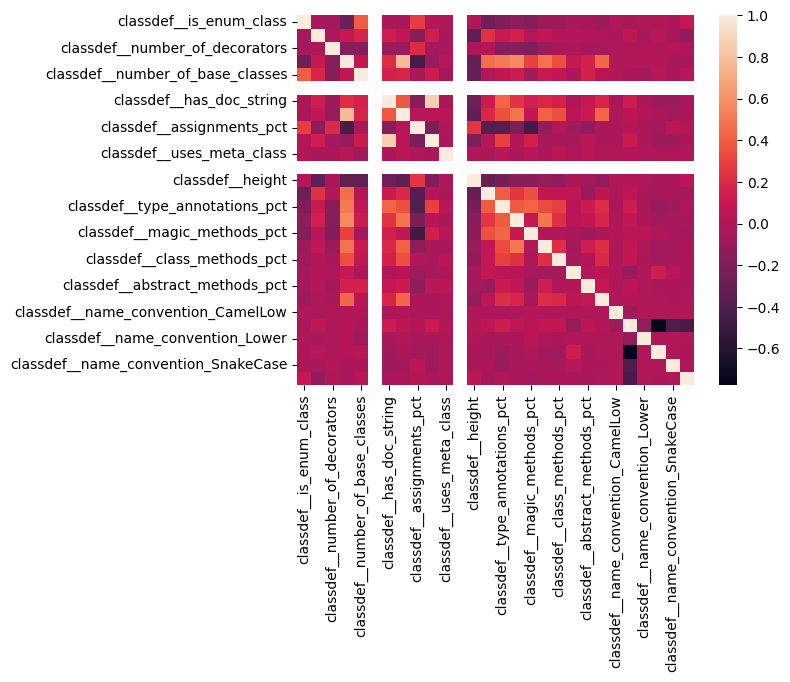

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 23 variables (8 numericas, 10 procentuales, 4 booleanas y 1 categorica)

### Variable is_enum_class (1/23)
Esta variable es de tipo booleano y representa si la clase hereda de la clase Enum.

<Axes: xlabel='classdef__is_enum_class', ylabel='Count'>

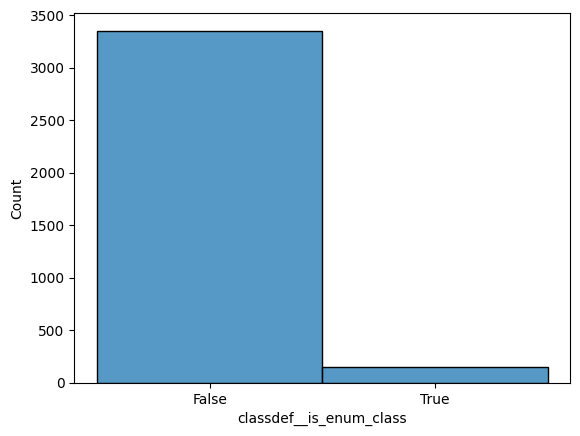

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__is_enum_class'], discrete=True)

In [11]:
num_true_values = len(X[X['classdef__is_enum_class'] == True])
num_false_values = len(X[X['classdef__is_enum_class'] == False])
std = X['classdef__is_enum_class'].std()
freq_true = len(X[X['classdef__is_enum_class'] == True]) / len(X['classdef__is_enum_class'])
freq_false = len(X[X['classdef__is_enum_class'] == False]) / len(X['classdef__is_enum_class'])
print(f'La variable is_enum_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a False es {freq_false}.')

La variable is_enum_class contiene 145 valores verdaderos y 3353 valores falsos. Y, la desviación típica es de 0.19936230778694153
La frecuencia con la que programa puede tener la variable is_enum_class a True es 0.04145225843339051.
La frecuencia con la que programa puede tener la variable is_enum_class a False es 0.9585477415666095.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__is_enum_class', possible_values)

La variable classdef__is_enum_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__is_enum_class toma el valor de 0.0 en un 95.85% de los items.
La variable classdef__is_enum_class toma el valor de 1.0 en un 4.145% de los items.


In [13]:
X[X['classdef__is_enum_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,145.0,145.000000,145.0,145.000000,145.000000,145.0,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.0,145.0,145.000000,145.0,145.000000,145.0,145.000000,145.0,145.000000
mean,1.0,15.689655,0.0,0.255172,1.765517,0.0,0.558621,6.310345,0.795236,0.149998,...,0.041207,0.0,0.0,0.020690,0.0,0.944828,0.0,0.013793,0.0,0.041379
std,0.0,5.909640,0.0,0.970247,0.425144,0.0,0.498273,6.615971,0.227871,0.167936,...,0.177745,0.0,0.0,0.142837,0.0,0.229108,0.0,0.117036,0.0,0.199856
min,1.0,6.000000,0.0,0.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,1.0,12.000000,0.0,0.000000,2.000000,0.0,0.000000,3.000000,0.666667,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,1.0,15.000000,0.0,0.000000,2.000000,0.0,1.000000,4.000000,0.833333,0.100000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,1.0,19.000000,0.0,0.000000,2.000000,0.0,1.000000,6.000000,1.000000,0.250000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,1.0,34.000000,0.0,8.000000,2.000000,0.0,1.000000,41.000000,1.000000,0.600000,...,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


### IMPORTANTE
Apenas un 2% de clase son Enum

### Variable has_generic_type_annotations (2/23)
Esta variable es de tipo booleano y representa si la clase define un tipo genérico

<Axes: xlabel='classdef__has_generic_type_annotations', ylabel='Count'>

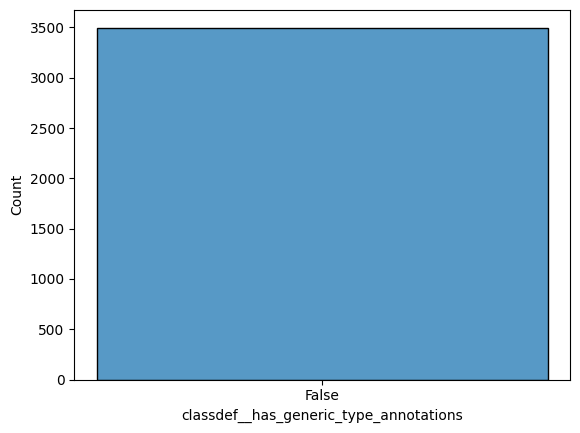

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_generic_type_annotations'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_generic_type_annotations'] == True])
num_false_values = len(X[X['classdef__has_generic_type_annotations'] == False])
std = X['classdef__has_generic_type_annotations'].std()
freq_true = len(X[X['classdef__has_generic_type_annotations'] == True]) / len(X['classdef__has_generic_type_annotations'])
freq_false = len(X[X['classdef__has_generic_type_annotations'] == False]) / len(X['classdef__has_generic_type_annotations'])
print(f'La variable has_generic_type_annotations contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es {freq_false}.')

La variable has_generic_type_annotations contiene 0 valores verdaderos y 3498 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es 0.0.
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es 1.0.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_generic_type_annotations', possible_values)

La variable classdef__has_generic_type_annotations contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_generic_type_annotations toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__has_generic_type_annotations toma el valor de True en un 0.0% de los items. [OUTLIER]


In [17]:
X[X['classdef__has_generic_type_annotations'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna definicion de clase que tenga anotaciones de tipo genérico.
Esta propiedad es de python 3.12.

### Variable has_doc_string (3/23)
Esta variable es booleana y representa si el primer elemento del cuerpo de la clase es un doc_string. String planos usados como comentarios.

<Axes: xlabel='classdef__has_doc_string', ylabel='Count'>

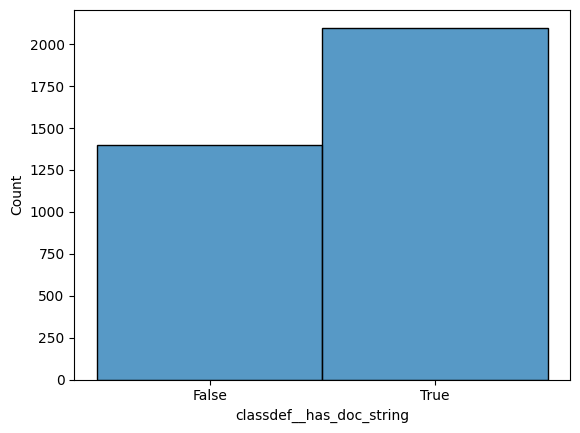

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_doc_string'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_doc_string'] == True])
num_false_values = len(X[X['classdef__has_doc_string'] == False])
std = X['classdef__has_doc_string'].std()
freq_true = len(X[X['classdef__has_doc_string'] == True]) / len(X['classdef__has_doc_string'])
freq_false = len(X[X['classdef__has_doc_string'] == False]) / len(X['classdef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 2099 valores verdaderos y 1399 valores falsos. Y, la desviación típica es de 0.4899563193321228
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.6000571755288736.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.39994282447112633.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_doc_string', possible_values)

La variable classdef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_doc_string toma el valor de 1.0 en un 60.01% de los items.
La variable classdef__has_doc_string toma el valor de 0.0 en un 39.99% de los items.


In [21]:
X[X['classdef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.0,2099.0,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.00000,2099.000000,2099.000000,2099.0,2099.000000,2099.0,2099.000000,2099.000000,2099.000000
mean,0.038590,17.412102,0.060981,5.071463,0.997141,0.0,1.0,8.169604,0.203664,0.212234,...,0.073713,0.01306,0.034898,0.062295,0.0,0.981896,0.0,0.012387,0.000953,0.004764
std,0.192661,6.384806,0.239353,7.819376,0.369205,0.0,0.0,9.011740,0.264094,0.140844,...,0.167935,0.09460,0.153530,0.154718,0.0,0.133359,0.0,0.110631,0.030861,0.068875
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.004310,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,13.000000,0.000000,2.000000,1.000000,0.0,1.0,4.000000,0.000000,0.111111,...,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.0,6.000000,0.000000,0.166667,...,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,21.000000,0.000000,7.000000,1.000000,0.0,1.0,10.000000,0.390097,0.333333,...,0.071429,0.00000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,48.000000,1.000000,231.000000,2.000000,0.0,1.0,232.000000,0.969697,1.000000,...,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


### Variable uses_meta_class (4/23)
Esta variable es booleana y representa si la clase usa una metaclass.

<Axes: xlabel='classdef__uses_meta_class', ylabel='Count'>

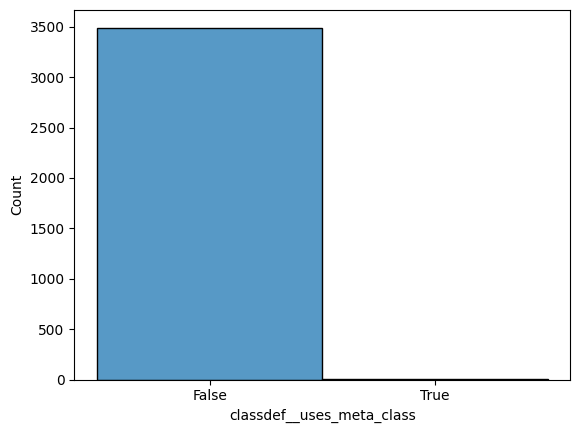

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__uses_meta_class'], discrete=True)

In [23]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__uses_meta_class'] == True])
num_false_values = len(X[X['classdef__uses_meta_class'] == False])
std = X['classdef__uses_meta_class'].std()
freq_true = len(X[X['classdef__uses_meta_class'] == True]) / len(X['classdef__uses_meta_class'])
freq_false = len(X[X['classdef__uses_meta_class'] == False]) / len(X['classdef__uses_meta_class'])
print(f'La variable uses_meta_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a False es {freq_false}.')

La variable uses_meta_class contiene 7 valores verdaderos y 3491 valores falsos. Y, la desviación típica es de 0.04469574987888336
La frecuencia con la que programa puede tener la variable uses_meta_class a True es 0.002001143510577473.
La frecuencia con la que programa puede tener la variable uses_meta_class a False es 0.9979988564894225.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__uses_meta_class', possible_values)

La variable classdef__uses_meta_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__uses_meta_class toma el valor de 0.0 en un 99.8% de los items.
La variable classdef__uses_meta_class toma el valor de 1.0 en un 0.2001% de los items.


In [25]:
X[X['classdef__uses_meta_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,7.0,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.0,7.000000,7.000000,7.0,7.0,7.0,7.0,7.0,7.0
mean,0.0,13.714286,0.0,4.857143,0.428571,0.0,0.428571,6.714286,0.195918,0.108225,...,0.152381,0.0,0.104762,0.085714,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,1.496027,0.0,2.478479,0.534522,0.0,0.534522,2.058663,0.189111,0.184415,...,0.152579,0.0,0.179947,0.226779,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,13.000000,0.0,3.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,13.000000,0.0,3.000000,0.000000,0.0,0.000000,5.500000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,13.000000,0.0,5.000000,0.000000,0.0,0.000000,6.000000,0.285714,0.000000,...,0.200000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,13.500000,0.0,5.000000,1.000000,0.0,1.000000,7.000000,0.342857,0.128788,...,0.266667,0.0,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,17.000000,0.0,10.000000,1.000000,0.0,1.000000,11.000000,0.400000,0.500000,...,0.333333,0.0,0.400000,0.600000,0.0,1.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Menos del 0,2% de las clases usan metaclass.

### Variable number_of_characters (5/23)
Esta variable representa el número de caracteres que tiene el nombre de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 2 - 52. Con una media de 16.75.

<Axes: ylabel='classdef__number_of_characters'>

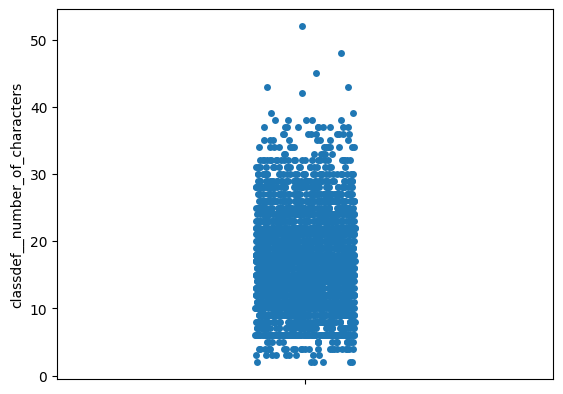

In [26]:
sns.stripplot(X['classdef__number_of_characters'])

In [27]:
print_outliers_for_df_column(X, 'classdef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5001144424721211
Rango valores atípicos extremos (Tukey): [-15.0,48.0]
Rango valores atípicos leves (Tukey): [-1.5,34.5]
Rango valores atípicos extremos (Fixed BoxPlot): [9.654991241657878,120.79793136858126]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -15.0 (Q1-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -1.5 (Q1-1.5*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 40 instancias tienen un valor para classdef__number_of_characters superior a 34.5 (Q3+1.5*IQR) para classdef__number_of_characters. Representando un 1.144% del total de instancias.
+3.0IQR: 1 instancias tienen un valor para classdef__number_of_characters superior a 48.0 (Q3-3*IQR) para classdef__number_of_characters. Representando un 0.02859% del 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 34.5 (Con un MC de 50 usamos Tuckey)

In [28]:
X[X['classdef__number_of_characters'] > 34.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Variable number_of_decorators (6/23)
Esta variable representa el número de decoradores que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 5. Con una media de 0.097.

<Axes: ylabel='classdef__number_of_decorators'>

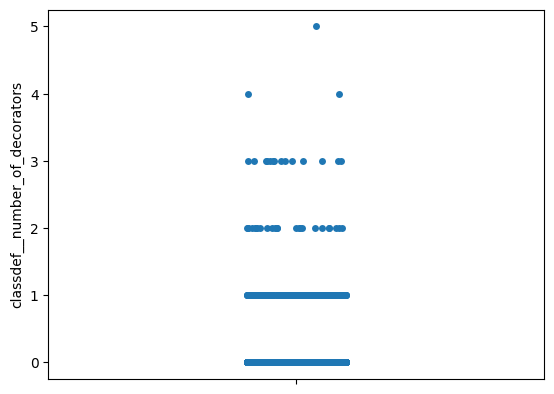

In [29]:
sns.stripplot(X['classdef__number_of_decorators'])

In [30]:
print_outliers_for_df_column(X, 'classdef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8598094674508421
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 277 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_decorators. Representando un 7.919% del total de instancias.
+3.0IQR: 277 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3-3*IQR) para classdef__number_of_decorators. Representando un 7.919% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [31]:
X[X['classdef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,277.0,277.000000,277.000000,277.000000,277.000000,277.0,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.0,277.000000,277.0,277.000000,277.000000,277.000000
mean,0.0,16.805054,1.223827,2.050541,0.711191,0.0,0.462094,4.808664,0.457958,0.118044,...,0.067979,0.014991,0.005716,0.044621,0.0,0.963899,0.0,0.018051,0.010830,0.007220
std,0.0,7.715379,0.602299,2.868679,0.454029,0.0,0.499463,4.074870,0.282894,0.169350,...,0.196874,0.086845,0.049070,0.137276,0.0,0.186879,0.0,0.133375,0.103691,0.084818
min,0.0,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,11.000000,1.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
50%,0.0,16.000000,1.000000,1.000000,1.000000,0.0,0.000000,3.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
75%,0.0,21.000000,1.000000,2.000000,1.000000,0.0,1.000000,6.000000,0.666667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
max,0.0,48.000000,5.000000,28.000000,1.000000,0.0,1.000000,36.000000,1.000000,1.000000,...,1.000000,1.000000,0.500000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


### IMPORTANTE
El 93% de las clases no tienen decoradores.

### Variable number_of_methods (7/23)
Esta variable representa el número de métodos en la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 231. Con una media de 4.45.

<Axes: ylabel='classdef__number_of_methods'>

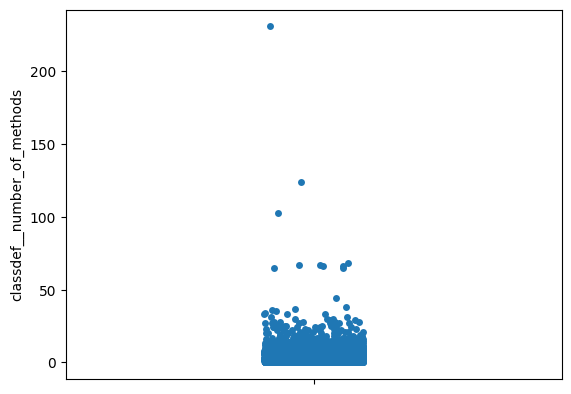

In [33]:
sns.stripplot(X['classdef__number_of_methods'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [34]:
print_outliers_for_df_column(X, 'classdef__number_of_methods')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7046018641008842
Rango valores atípicos extremos (Tukey): [-14.0,21.0]
Rango valores atípicos leves (Tukey): [-6.5,13.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.3631387746966531,131.62615552070477]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -14.0 (Q1-3*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -6.5 (Q1-1.5*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
+1.5IQR: 171 instancias tienen un valor para classdef__number_of_methods superior a 13.5 (Q3+1.5*IQR) para classdef__number_of_methods. Representando un 4.889% del total de instancias.
+3.0IQR: 65 instancias tienen un valor para classdef__number_of_methods superior a 21.0 (Q3-3*IQR) para classdef__number_of_methods. Representando un 1.858% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17 (Con un MC de 70 usamos Tuckey Extremo)

In [88]:
X[X['classdef__number_of_methods'] > 21].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,65.0,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.0,65.000000,65.0,65.0
mean,0.0,15.292308,0.015385,37.261539,0.984615,0.0,0.538462,41.569229,0.085709,0.017791,...,0.017596,0.020862,0.036339,0.075333,0.0,0.861538,0.0,0.138462,0.0,0.0
std,0.0,5.970561,0.124035,31.121876,0.279078,0.0,0.502398,30.997463,0.136370,0.020048,...,0.026061,0.125742,0.140087,0.097671,0.0,0.348072,0.0,0.348072,0.0,0.0
min,0.0,4.000000,0.000000,22.000000,0.000000,0.0,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,0.0,12.000000,0.000000,24.000000,1.000000,0.0,0.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0
50%,0.0,15.000000,0.000000,27.000000,1.000000,0.0,1.000000,31.000000,0.000000,0.009259,...,0.000000,0.000000,0.000000,0.040000,0.0,1.000000,0.0,0.000000,0.0,0.0
75%,0.0,18.000000,0.000000,33.000000,1.000000,0.0,1.000000,46.000000,0.142857,0.034483,...,0.040000,0.000000,0.000000,0.120000,0.0,1.000000,0.0,0.000000,0.0,0.0
max,0.0,32.000000,1.000000,231.000000,2.000000,0.0,1.000000,232.000000,0.416667,0.097561,...,0.086957,1.000000,0.766667,0.500000,0.0,1.000000,0.0,1.000000,0.0,0.0


### IMPORTANTE
Hay que revisar los 3 que son mayores de 100

### Variable number_of_base_classes (8/23)
Esta variable representa el número de base_classes que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 4. Con una media de 0.949.

<Axes: ylabel='classdef__number_of_base_classes'>

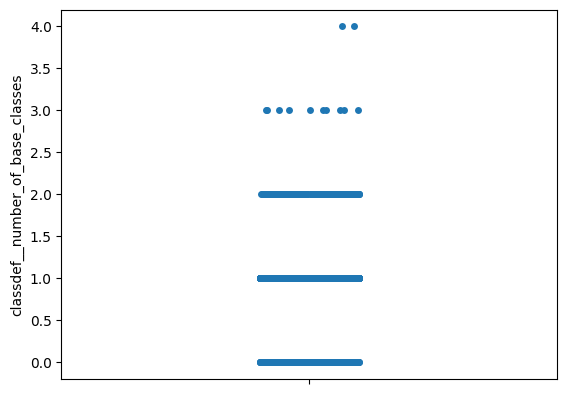

In [37]:
sns.stripplot(X['classdef__number_of_base_classes'])

In [38]:
print_outliers_for_df_column(X, 'classdef__number_of_base_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.25
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 399 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-3*IQR) para classdef__number_of_base_classes. Representando un 11.41% del total de instancias.
-1.5IQR: 399 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-1.5*IQR) para classdef__number_of_base_classes. Representando un 11.41% del total de instancias.
+1.5IQR: 206 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3+1.5*IQR) para classdef__number_of_base_classes. Representando un 5.889% del total de instancias.
+3.0IQR: 206 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3-3*IQR) para classdef__number_of_base_classes. Representando un 5.889% del total de instancias.
L: 399 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor o menor que 1 (Todos los umbrales son 1)

In [39]:
X[(X['classdef__number_of_base_classes'] > 1) & X['classdef__number_of_base_classes'] < 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable average_stmts_method_body (9/23)
Esta variable representa el número medio de sentencias en los métodos de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 58. Con una media de 3.34.

<Axes: ylabel='classdef__average_stmts_method_body'>

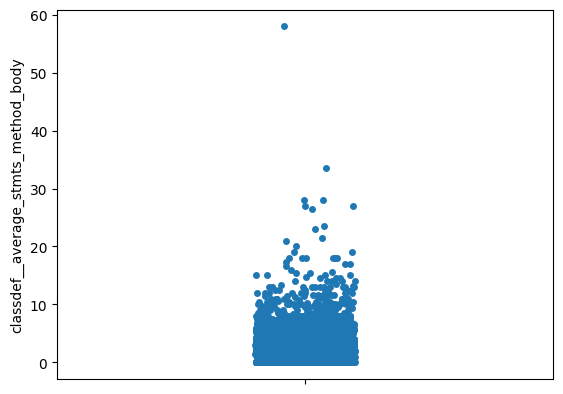

In [40]:
sns.stripplot(X['classdef__average_stmts_method_body'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [41]:
print_outliers_for_df_column(X, 'classdef__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8914836072755916
Rango valores atípicos extremos (Tukey): [-8.136363506317139,13.977272629737854]
Rango valores atípicos leves (Tukey): [-3.3977271914482117,9.238636314868927]
Rango valores atípicos extremos (Fixed BoxPlot): [1.1317046635731136,172.117370642914]
-3.0IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -8.136363506317139 (Q1-3*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -3.3977271914482117 (Q1-1.5*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 144 instancias tienen un valor para classdef__average_stmts_method_body superior a 9.238636314868927 (Q3+1.5*IQR) para classdef__average_stmts_method_body. Representando un 4.117% del total de instancias.
+3.0IQR: 41 instancias tienen un valor par

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13.977 (Con un MC de 89 usamos Tuckey Extremo)

In [89]:
X[X['classdef__average_stmts_method_body'] > 13.977].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,41.0,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,...,41.0,41.000000,41.0,41.0,41.0,41.000000,41.0,41.0,41.000000,41.0
mean,0.0,20.097561,0.707317,1.756098,0.975610,0.0,0.146341,2.975610,0.321719,0.052846,...,0.0,0.097561,0.0,0.0,0.0,0.975610,0.0,0.0,0.024390,0.0
std,0.0,7.388521,0.980915,1.337544,0.156174,0.0,0.357839,1.981007,0.237962,0.135344,...,0.0,0.300406,0.0,0.0,0.0,0.156174,0.0,0.0,0.156174,0.0
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
25%,0.0,14.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
50%,0.0,19.000000,0.000000,1.000000,1.000000,0.0,0.000000,3.000000,0.333333,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
75%,0.0,27.000000,1.000000,2.000000,1.000000,0.0,0.000000,3.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
max,0.0,34.000000,3.000000,9.000000,1.000000,0.0,1.000000,14.000000,0.750000,0.500000,...,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0


### Variable body_count (10/23)
Esta variable representa el número de sentencias que tiene la clase en el root. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 232. Con una media de 6.98.

<Axes: ylabel='classdef__body_count'>

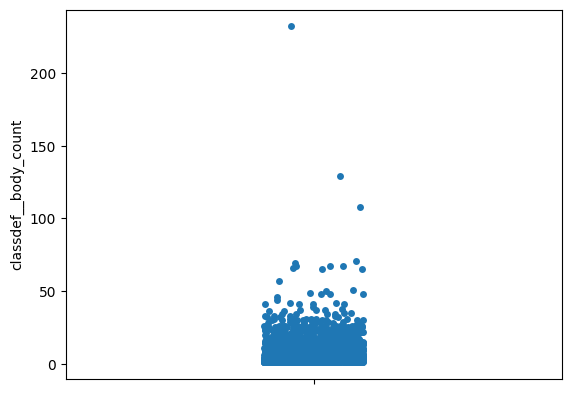

In [43]:
sns.stripplot(X['classdef__body_count'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [44]:
print_outliers_for_df_column(X, 'classdef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6364813320160543
Rango valores atípicos extremos (Tukey): [-12.0,23.0]
Rango valores atípicos leves (Tukey): [-4.5,15.5]
Rango valores atípicos extremos (Fixed BoxPlot): [2.191667375764859,103.66268907429055]
-3.0IQR: 0 instancias tienen un valor para classdef__body_count inferior a -12.0 (Q1-3*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__body_count inferior a -4.5 (Q1-1.5*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 308 instancias tienen un valor para classdef__body_count superior a 15.5 (Q3+1.5*IQR) para classdef__body_count. Representando un 8.805% del total de instancias.
+3.0IQR: 137 instancias tienen un valor para classdef__body_count superior a 23.0 (Q3-3*IQR) para classdef__body_count. Representando un 3.917% del total de instancias.
L: 792 instancias tienen un valor para classdef__body_coun

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 23.0 (Con un MC de 63 usamos Tuckey Extremo)

In [90]:
X[X['classdef__body_count'] > 23].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.0,137.000000,137.0,137.000000
mean,0.036496,15.248176,0.021898,23.970802,1.000000,0.0,0.708029,35.036495,0.298270,0.052297,...,0.033278,0.005537,0.023333,0.138990,0.0,0.912409,0.0,0.080292,0.0,0.007299
std,0.188210,6.031511,0.146887,25.093632,0.320844,0.0,0.456337,22.768467,0.265492,0.084446,...,0.046094,0.022711,0.106673,0.204369,0.0,0.283737,0.0,0.272742,0.0,0.085436
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,24.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,11.000000,0.000000,13.000000,1.000000,0.0,0.000000,25.000000,0.031008,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,15.000000,0.000000,18.000000,1.000000,0.0,1.000000,28.000000,0.281250,0.034483,...,0.000000,0.000000,0.000000,0.071429,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,19.000000,0.000000,27.000000,1.000000,0.0,1.000000,35.000000,0.492958,0.040000,...,0.066667,0.000000,0.000000,0.153846,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,1.000000,32.000000,1.000000,231.000000,2.000000,0.0,1.000000,232.000000,1.000000,0.478873,...,0.250000,0.185185,0.766667,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


### IMPORTANTE
Hay 1 clase con mas de 220 sentencias en el body.  

### Variable number_of_keywords (11/23)
Esta variable representa el número de keywords diferentes de metaclass que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. La media es 0. 

<Axes: ylabel='classdef__number_of_keywords'>

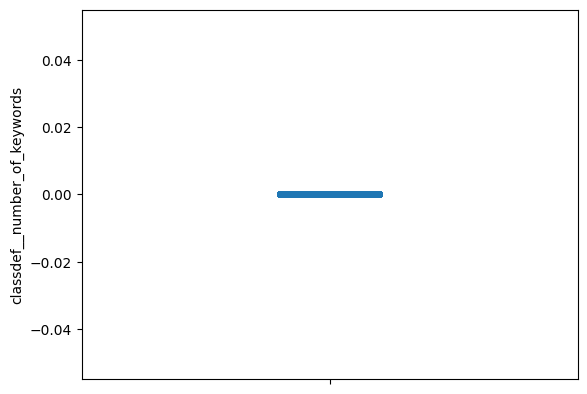

In [46]:
sns.stripplot(X['classdef__number_of_keywords'])

In [47]:
print_outliers_for_df_column(X, 'classdef__number_of_keywords')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para classdef__number_of

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [48]:
X[X['classdef__number_of_keywords'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
El 100% de las clases no tienen keywords.

### Variable height (12/23)
Esta variable representa la distancia a la raiz del modulo en la que se encuentra la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 5. Con una media de 1.08.

<Axes: ylabel='classdef__height'>

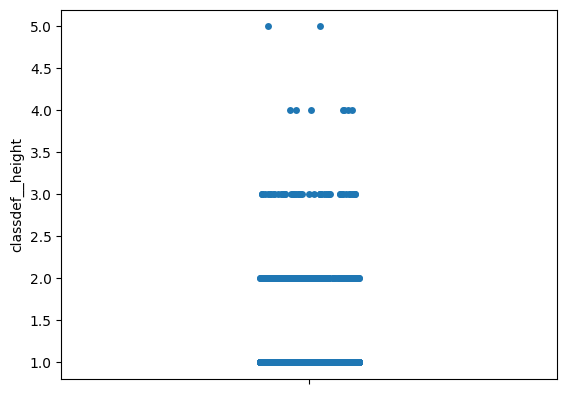

In [49]:
sns.stripplot(X['classdef__height'])

In [50]:
print_outliers_for_df_column(X, 'classdef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-3*IQR) para classdef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-1.5*IQR) para classdef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 229 instancias tienen un valor para classdef__height superior a 1.0 (Q3+1.5*IQR) para classdef__height. Representando un 6.547% del total de instancias.
+3.0IQR: 229 instancias tienen un valor para classdef__height superior a 1.0 (Q3-3*IQR) para classdef__height. Representando un 6.547% del total de instancias.
L: 0 instancias tienen un valor para classdef__height inferior a 1.0 para classdef__height. Representando un 0.0% del total de instancias.
U: 22

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [51]:
X[X['classdef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.0,229.000000,229.0,229.000000,229.0,229.000000,229.0,229.000000
mean,0.048035,8.764193,0.065502,0.471616,0.454148,0.0,0.126638,1.908297,0.691814,0.047645,...,0.007096,0.018559,0.0,0.010371,0.0,0.969432,0.0,0.008734,0.0,0.021834
std,0.214309,5.136414,0.247952,1.053535,0.507698,0.0,0.333295,1.540498,0.426588,0.133058,...,0.057510,0.132182,0.0,0.096336,0.0,0.172520,0.0,0.093249,0.0,0.146462
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.333333,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,10.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,1.000000,39.000000,1.000000,8.000000,2.000000,0.0,1.000000,9.000000,1.000000,0.500000,...,0.500000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable assignments_pct (13/23)
Esta variable representa la proporción de las sentencias en el root de la clase que son asignaciones. Toma los valores de 0.0 - 1.0. La media es 0.266.

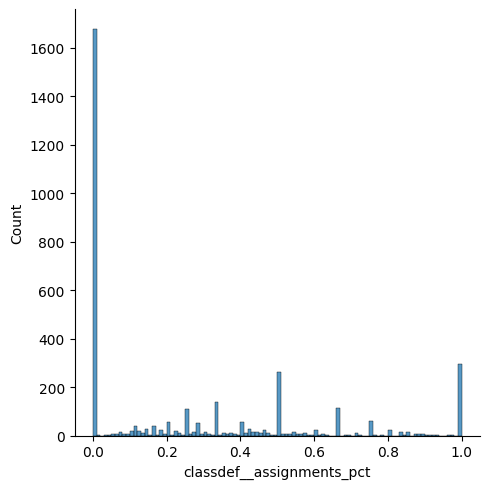

In [52]:
sns.displot(X['classdef__assignments_pct'], bins=[i / 100 for i in range(0, 101)])

In [53]:
print_outliers_for_df_column(X, 'classdef__assignments_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4035150110721588
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.18268633535378856,4.267373113936102]
-3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -1.5 (Q1-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.75 (Q1-1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct superior a 1.25 (Q3+1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct superior a 2.0 (Q3-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.25 (Con un MC de 40 usamos Tuckey)

In [91]:
X[X['classdef__assignments_pct'] > 1.25].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable expressions_pct (14/23)
Esta variable representa la proporción de las sentencias en root de la clase que son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.12.

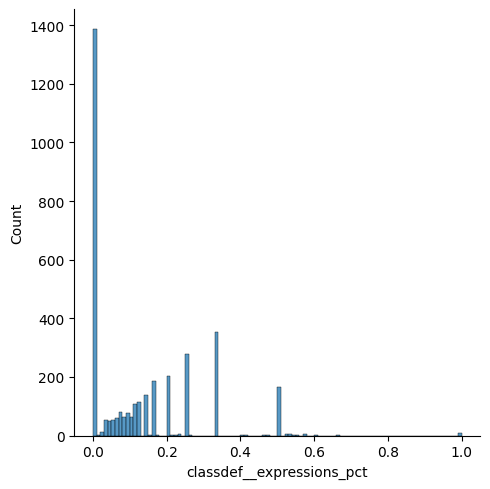

In [55]:
sns.displot(X['classdef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [56]:
print_outliers_for_df_column(X, 'classdef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7010155476513855
Rango valores atípicos extremos (Tukey): [-0.6000000089406967,0.800000011920929]
Rango valores atípicos leves (Tukey): [-0.30000000447034836,0.5000000074505806]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0257962226624725,5.153475254116787]
-3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.6000000089406967 (Q1-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.30000000447034836 (Q1-1.5*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 30 instancias tienen un valor para classdef__expressions_pct superior a 0.5000000074505806 (Q3+1.5*IQR) para classdef__expressions_pct. Representando un 0.8576% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para classdef__expressions_pct superior a 0.800000011920

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.5 (Con un MC de 70 usamos Tuckey)

In [92]:
X[X['classdef__expressions_pct'] > 0.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,30.000000,30.000000,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.000000,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,0.233333,16.166666,0.066667,0.0,1.166667,0.0,1.0,7.533333,0.292511,0.707489,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.430183,5.318046,0.253708,0.0,0.379049,0.0,0.0,6.123631,0.212964,0.212964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,8.000000,0.000000,0.0,1.000000,0.0,1.0,1.000000,0.000000,0.526316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.000000,13.250000,0.000000,0.0,1.000000,0.0,1.0,1.000000,0.000000,0.540210,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.000000,15.500000,0.000000,0.0,1.000000,0.0,1.0,7.000000,0.428571,0.571429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.000000,18.000000,0.000000,0.0,1.000000,0.0,1.0,12.500000,0.459790,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,1.000000,31.000000,1.000000,0.0,2.000000,0.0,1.0,19.000000,0.473684,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Variable type_annotations_pct (15/23)
Esta variable representa la proporción de parámetros y returns con anotacion de tipo en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.29. 

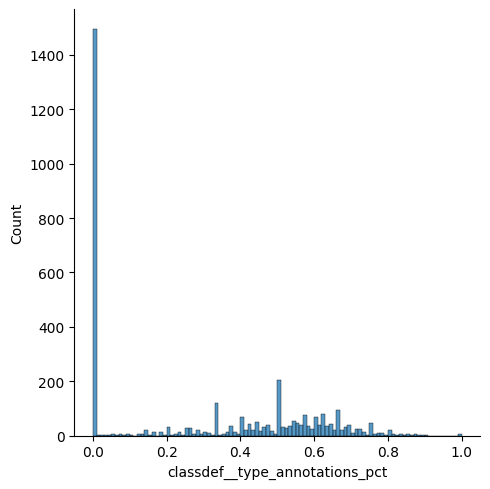

In [58]:
sns.displot(X['classdef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [59]:
print_outliers_for_df_column(X, 'classdef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5753057107608412
Rango valores atípicos extremos (Tukey): [-1.6666667461395264,2.222222328186035]
Rango valores atípicos leves (Tukey): [-0.8333333730697632,1.388888955116272]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.11125932994554419,8.8775449579582]
-3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -1.6666667461395264 (Q1-3*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.8333333730697632 (Q1-1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct superior a 1.388888955116272 (Q3+1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.38 (Con un MC de 57 usamos Tuckey)

In [93]:
X[X['classdef__type_annotations_pct'] > 1.38].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable private_methods_pct (16/23)
Esta variable representa la proporción de métodos que son privados en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.14

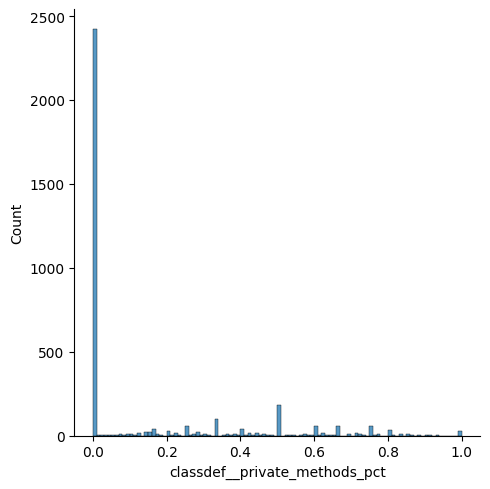

In [61]:
sns.displot(X['classdef__private_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [62]:
print_outliers_for_df_column(X, 'classdef__private_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43525267922361655
Rango valores atípicos extremos (Tukey): [-0.6666666716337204,0.8888888955116272]
Rango valores atípicos leves (Tukey): [-0.3333333358168602,0.555555559694767]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.07265764539558728,2.1232571496951334]
-3.0IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a -0.6666666716337204 (Q1-3*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a -0.3333333358168602 (Q1-1.5*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 352 instancias tienen un valor para classdef__private_methods_pct superior a 0.555555559694767 (Q3+1.5*IQR) para classdef__private_methods_pct. Representando un 10.06% del total de instancias.
+3.0IQR: 34 instancias tienen un valor para classdef__private_methods_p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.555 (Con un coeficiente de MC de 43 usamos Tukey)

In [94]:
X[X['classdef__private_methods_pct'] > 0.555].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,352.0,352.000000,352.0,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.0,352.000000,352.0,352.000000
mean,0.0,19.173296,0.0,7.571023,1.051136,0.0,0.769886,10.426136,0.110270,0.111667,...,0.054720,0.008650,0.019641,0.033104,0.0,0.988636,0.0,0.008523,0.0,0.002841
std,0.0,6.289871,0.0,5.392362,0.297566,0.0,0.421505,8.278294,0.169855,0.102747,...,0.081634,0.066896,0.088956,0.103130,0.0,0.106144,0.0,0.092055,0.0,0.053300
min,0.0,4.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,15.000000,0.0,5.000000,1.000000,0.0,1.000000,6.000000,0.000000,0.038105,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.0,18.000000,0.0,6.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.090909,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.0,24.000000,0.0,9.000000,1.000000,0.0,1.000000,12.000000,0.192857,0.166667,...,0.125000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,0.0,36.000000,0.0,33.000000,3.000000,0.0,1.000000,51.000000,0.590909,0.500000,...,0.384615,0.833333,0.666667,0.666667,0.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable magic_methods_pct (17/23)
Esta variable representa la proporción de métodos que son magic en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.177

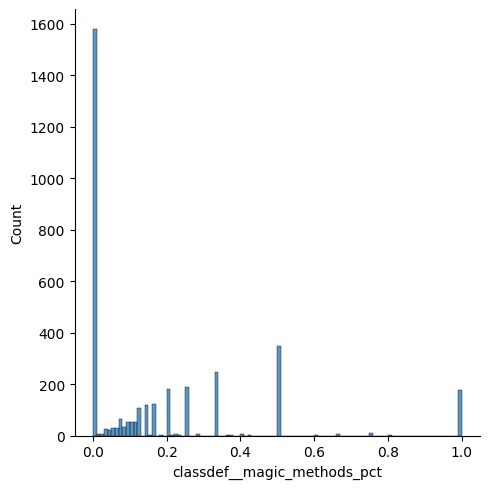

In [64]:
sns.displot(X['classdef__magic_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [65]:
print_outliers_for_df_column(X, 'classdef__magic_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3063861667603357
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.12832606944740896,1.5272577718355258]
-3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.75 (Q1-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.375 (Q1-1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 195 instancias tienen un valor para classdef__magic_methods_pct superior a 0.625 (Q3+1.5*IQR) para classdef__magic_methods_pct. Representando un 5.575% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.0 (Q3-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un coeficiente de MC de 30 usamos Tukey)

In [95]:
X[X['classdef__magic_methods_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,...,195.0,195.0,195.000000,195.0,195.0,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.025641,15.441026,0.076923,1.564103,0.769231,0.0,0.553846,2.948718,0.156988,0.188352,...,0.0,0.0,0.007692,0.0,0.0,0.969231,0.010256,0.005128,0.010256,0.005128
std,0.158469,5.806179,0.267155,0.902313,0.457556,0.0,0.498372,1.846545,0.255374,0.198034,...,0.0,0.0,0.075759,0.0,0.0,0.173136,0.101013,0.071611,0.101013,0.071611
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16.000000,0.000000,1.000000,1.000000,0.0,1.000000,2.000000,0.000000,0.166667,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,0.000000,2.000000,1.000000,0.0,1.000000,4.000000,0.333333,0.333333,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,30.000000,1.000000,5.000000,2.000000,0.0,1.000000,9.000000,0.857143,0.500000,...,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable async_methods_pct (18/23)
Esta variable representa la proporción de métodos que son asincronos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.05

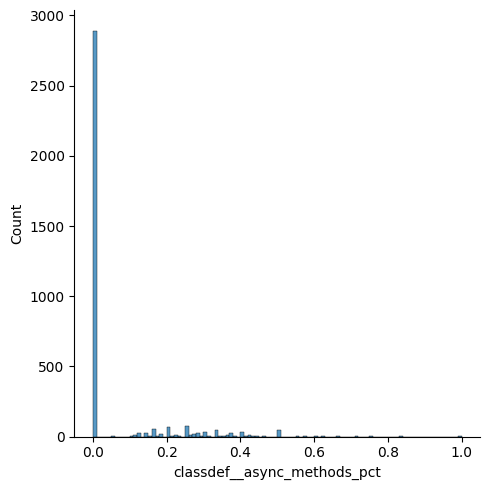

In [67]:
sns.displot(X['classdef__async_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [68]:
print_outliers_for_df_column(X, 'classdef__async_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7710242644264851
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 608 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__async_methods_pct. Representando un 17.38% del total de instancias.
+3.0IQR: 608 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__async_methods_pct. Representando un 17.38% del total de instancias.
L: 0 instancias tienen un valor para clas

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [69]:
X[X['classdef__async_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,608.0,608.000000,608.000000,608.000000,608.000000,608.0,608.000000,608.000000,608.000000,608.000000,...,608.000000,608.000000,608.000000,608.000000,608.0,608.000000,608.0,608.000000,608.0,608.000000
mean,0.0,17.643091,0.019737,8.968750,1.036184,0.0,0.802632,12.389803,0.138215,0.090830,...,0.058306,0.001439,0.051357,0.073710,0.0,0.991776,0.0,0.004934,0.0,0.003289
std,0.0,5.827780,0.139209,5.774226,0.284712,0.0,0.398340,8.492134,0.181286,0.070756,...,0.077236,0.011004,0.172923,0.117638,0.0,0.090385,0.0,0.070128,0.0,0.057307
min,0.0,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,14.000000,0.000000,5.000000,1.000000,0.0,1.000000,6.000000,0.000000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.0,17.000000,0.000000,8.000000,1.000000,0.0,1.000000,10.000000,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.0,21.000000,0.000000,11.000000,1.000000,0.0,1.000000,15.000000,0.280000,0.129464,...,0.111111,0.000000,0.000000,0.125000,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,0.0,35.000000,1.000000,38.000000,2.000000,0.0,1.000000,51.000000,0.666667,0.333333,...,0.375000,0.111111,1.000000,0.625000,0.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable class_methods_pct (19/23)
Esta variable representa la proporción de métodos que son de clase en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.06

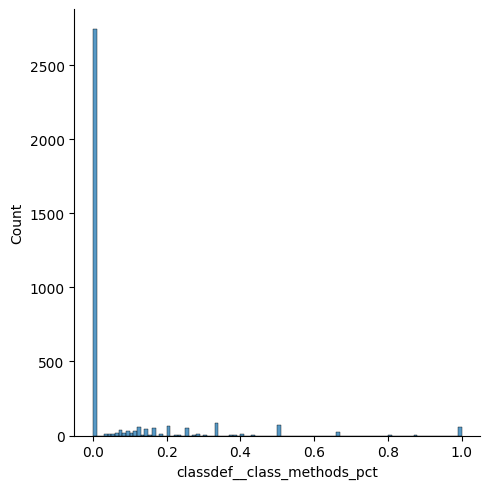

In [70]:
sns.displot(X['classdef__class_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [71]:
print_outliers_for_df_column(X, 'classdef__class_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.781858863127567
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 756 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__class_methods_pct. Representando un 21.61% del total de instancias.
+3.0IQR: 756 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__class_methods_pct. Representando un 21.61% del total de instancias.
L: 0 instancias tienen un valor para class

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [72]:
X[X['classdef__class_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.0,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.0,756.000000,756.0,756.000000,756.0,756.000000
mean,0.010582,16.544973,0.062169,7.362434,1.001323,0.0,0.750000,11.306878,0.227012,0.096420,...,0.294907,0.004119,0.022227,0.067313,0.0,0.990741,0.0,0.003968,0.0,0.005291
std,0.102391,5.982920,0.257543,5.427022,0.279542,0.0,0.433299,8.105660,0.219196,0.097515,...,0.259434,0.032507,0.116397,0.117855,0.0,0.095842,0.0,0.062911,0.0,0.072595
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.030303,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,13.000000,0.000000,3.000000,1.000000,0.0,0.750000,6.000000,0.000000,0.020306,...,0.125000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,16.000000,0.000000,6.000000,1.000000,0.0,1.000000,9.000000,0.222222,0.083333,...,0.200000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,20.000000,0.000000,10.000000,1.000000,0.0,1.000000,15.000000,0.409759,0.142857,...,0.333333,0.000000,0.000000,0.113333,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,1.000000,32.000000,2.000000,36.000000,3.000000,0.0,1.000000,51.000000,0.800000,0.500000,...,1.000000,0.500000,1.000000,0.666667,0.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable static_methods_pct (20/23)
Esta variable representa la proporción de métodos que son estaticos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.018.

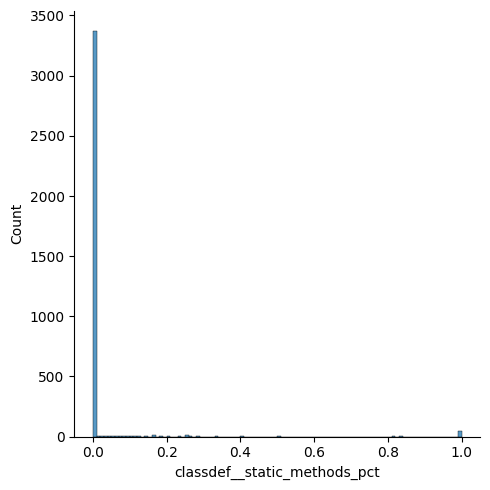

In [73]:
sns.displot(X['classdef__static_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [74]:
print_outliers_for_df_column(X, 'classdef__static_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9144158632729199
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 130 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__static_methods_pct. Representando un 3.716% del total de instancias.
+3.0IQR: 130 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__static_methods_pct. Representando un 3.716% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [75]:
X[X['classdef__static_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,130.0,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.0,130.000000,130.000000,130.0
mean,0.0,17.507692,0.076923,9.638461,0.907692,0.0,0.584615,12.023077,0.130128,0.086490,...,0.026079,0.496825,0.016846,0.044432,0.0,0.869231,0.0,0.115385,0.015385,0.0
std,0.0,7.287290,0.267500,24.339651,0.339771,0.0,0.494695,24.925459,0.205266,0.110338,...,0.083075,0.396013,0.074651,0.082356,0.0,0.338452,0.0,0.320721,0.123553,0.0
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.009709,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,0.0,13.000000,0.000000,2.000000,1.000000,0.0,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0
50%,0.0,16.000000,0.000000,5.000000,1.000000,0.0,1.000000,5.500000,0.000000,0.043478,...,0.000000,0.333333,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0
75%,0.0,20.000000,0.000000,9.000000,1.000000,0.0,1.000000,13.000000,0.230769,0.142857,...,0.000000,1.000000,0.000000,0.050000,0.0,1.000000,0.0,0.000000,0.000000,0.0
max,0.0,43.000000,1.000000,231.000000,2.000000,0.0,1.000000,232.000000,0.769231,0.500000,...,0.500000,1.000000,0.571429,0.333333,0.0,1.000000,0.0,1.000000,1.000000,0.0


### Variable abstract_methods_pct (21/23)
Esta variable representa la proporción de métodos que son abstractos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.026

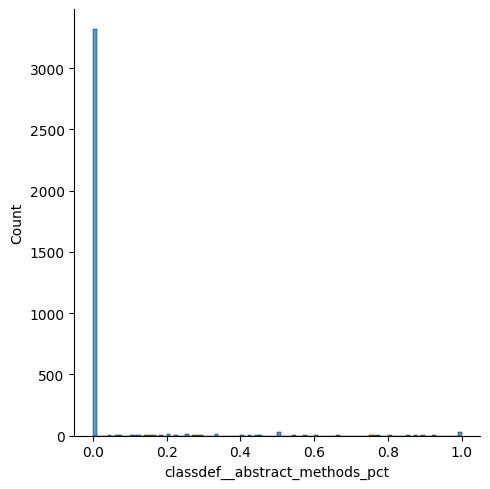

In [76]:
sns.displot(X['classdef__abstract_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [77]:
print_outliers_for_df_column(X, 'classdef__abstract_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8875478954810414
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 182 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__abstract_methods_pct. Representando un 5.203% del total de instancias.
+3.0IQR: 182 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__abstract_methods_pct. Representando un 5.203% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [78]:
X[X['classdef__abstract_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,182.0,182.000000,182.000000,182.000000,182.000000,182.0,182.00000,182.000000,182.000000,182.000000,...,182.000000,182.000000,182.000000,182.000000,182.0,182.0,182.0,182.0,182.0,182.0
mean,0.0,16.934067,0.021978,7.280220,1.252747,0.0,0.78022,9.159341,0.068138,0.141846,...,0.051407,0.007968,0.509688,0.083312,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,5.567868,0.147016,6.166524,0.558083,0.0,0.41524,7.058704,0.130176,0.133546,...,0.142879,0.038825,0.312418,0.179774,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,7.000000,0.000000,1.000000,0.000000,0.0,0.00000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.043478,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,13.000000,0.000000,3.000000,1.000000,0.0,1.00000,4.000000,0.000000,0.045109,...,0.000000,0.000000,0.250000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,16.000000,0.000000,6.000000,1.000000,0.0,1.00000,7.000000,0.000000,0.111111,...,0.000000,0.000000,0.500000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,21.000000,0.000000,9.750000,2.000000,0.0,1.00000,12.000000,0.076923,0.200000,...,0.000000,0.000000,0.800000,0.100000,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,34.000000,1.000000,37.000000,3.000000,0.0,1.00000,41.000000,0.500000,0.500000,...,1.000000,0.250000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0


### Variable property_methods_pct (22/23)
Esta variable representa la proporción de métodos que son property en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.048

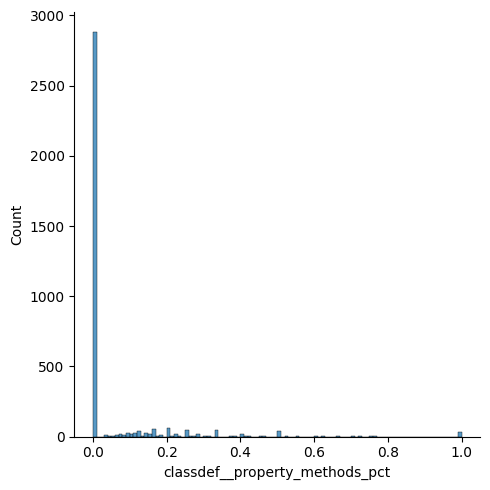

In [79]:
sns.displot(X['classdef__property_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [80]:
print_outliers_for_df_column(X, 'classdef__property_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8055615577539122
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 622 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__property_methods_pct. Representando un 17.78% del total de instancias.
+3.0IQR: 622 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__property_methods_pct. Representando un 17.78% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [81]:
X[X['classdef__property_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.0,622.000000,622.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.0,622.000000,622.0,622.000000,622.0,622.000000
mean,0.004823,16.442122,0.061093,10.324759,0.987138,0.0,0.790997,14.567524,0.198166,0.089975,...,0.069306,0.009392,0.045008,0.268387,0.0,0.971061,0.0,0.022508,0.0,0.006431
std,0.069337,6.099737,0.239694,13.731518,0.354172,0.0,0.406924,14.881533,0.211701,0.079462,...,0.105557,0.043846,0.166357,0.225562,0.0,0.167770,0.0,0.148448,0.0,0.079999
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.004329,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,12.000000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.036045,...,0.000000,0.000000,0.000000,0.125000,0.0,1.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,16.000000,0.000000,8.000000,1.000000,0.0,1.000000,11.000000,0.133333,0.076923,...,0.000000,0.000000,0.000000,0.200000,0.0,1.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,20.000000,0.000000,12.000000,1.000000,0.0,1.000000,17.000000,0.347076,0.125000,...,0.111111,0.000000,0.000000,0.333333,0.0,1.000000,0.0,0.000000,0.0,0.000000
max,1.000000,36.000000,1.000000,231.000000,2.000000,0.0,1.000000,232.000000,0.975610,0.500000,...,0.500000,0.400000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable name_convention (23/23)
Esta variable es de tipo categórica y representa la name_convention del nombre de la clase.

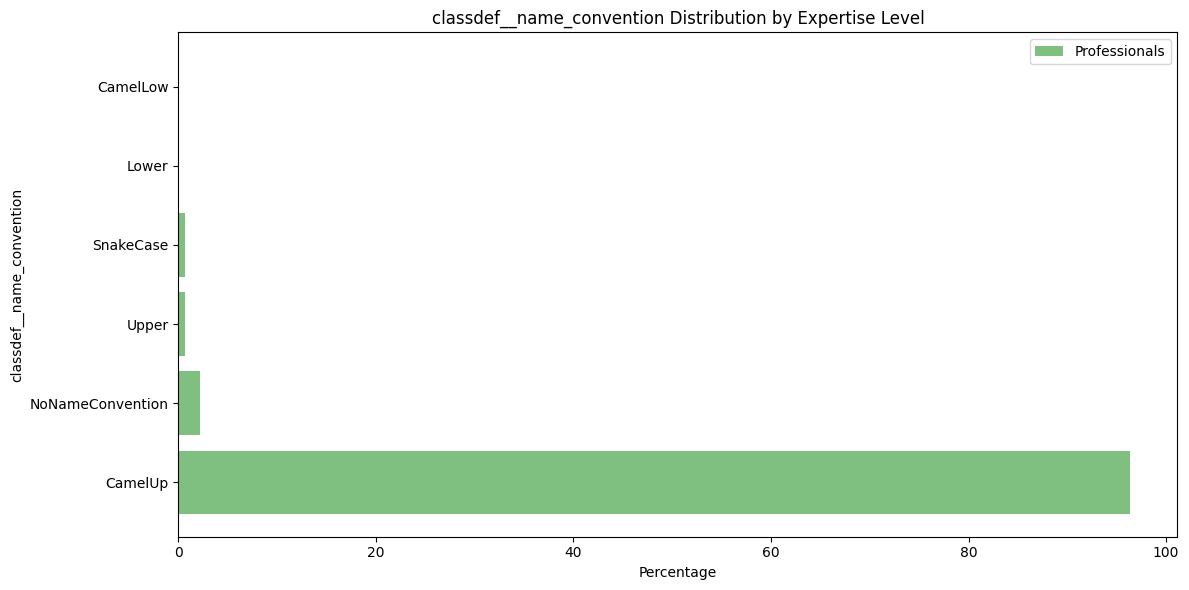

In [82]:
print_categorical_histogram(full_table, 'classdef__name_convention','classdef__expertise_level', include_all=False, include_beginners=False)

In [83]:
print_frequency_anal_for_cat_var(full_table, 'classdef__name_convention')

La variable classdef__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable classdef__name_convention toma el valor de CamelUp en un 96.34% de los items.
La variable classdef__name_convention toma el valor de NoNameConvention en un 2.23% de los items.
La variable classdef__name_convention toma el valor de Upper en un 0.7147% de los items.
La variable classdef__name_convention toma el valor de SnakeCase en un 0.6289% de los items.
La variable classdef__name_convention toma el valor de Lower en un 0.05718% de los items.
La variable classdef__name_convention toma el valor de CamelLow en un 0.02859% de los items. [OUTLIER]


In [84]:
print_values_usage_for_cat_var(full_table, 'classdef__name_convention', NAMING_CONVENTION_VALUES)

La variable classdef__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable classdef__name_convention nunca toma valor Discard.


### IMPORTANTE
Mas de un 9% no sigue el convenio de nombrado de clases de Python

## Multivariate

Isolation forest algorithm

In [85]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,classdef__name_convention,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,...,classdef__average_stmts_method_body,classdef__type_annotations_pct,classdef__private_methods_pct,classdef__magic_methods_pct,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__expertise_level
0,NoNameConvention,False,15,0,66,1,False,False,66,0.000000,...,1.227273,0.000000,0.015152,0.015152,0.0,0.0,0.0,0.0,0.136364,PROFESSIONAL
3,NoNameConvention,False,15,0,65,1,False,False,65,0.000000,...,1.184615,0.000000,0.000000,0.015385,0.0,0.0,0.0,0.0,0.138462,PROFESSIONAL
5,NoNameConvention,False,15,0,66,1,False,False,67,0.014925,...,1.196970,0.000000,0.015152,0.015152,0.0,0.0,0.0,0.0,0.136364,PROFESSIONAL
709,SnakeCase,False,14,0,9,1,False,False,14,0.357143,...,17.000000,0.000000,0.333333,0.000000,0.0,0.0,1.0,0.0,0.000000,PROFESSIONAL
1817,NoNameConvention,False,9,1,28,0,False,True,36,0.194444,...,2.500000,0.272727,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,PROFESSIONAL


### IMPORTANTE
Hay que analizar las 12 clases que son outliers.

In [86]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classdef__number_of_characters,5.0,13.600000,2.607681,9.000000,14.000000,15.000000,15.000000,15.000000
classdef__number_of_decorators,5.0,0.200000,0.447214,0.000000,0.000000,0.000000,0.000000,1.000000
classdef__number_of_methods,5.0,46.799999,26.696442,9.000000,28.000000,65.000000,66.000000,66.000000
classdef__number_of_base_classes,5.0,0.800000,0.447214,0.000000,1.000000,1.000000,1.000000,1.000000
classdef__has_generic_type_annotations,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classdef__has_doc_string,5.0,0.200000,0.447214,0.000000,0.000000,0.000000,0.000000,1.000000
classdef__body_count,5.0,49.599998,23.776037,14.000000,36.000000,65.000000,66.000000,67.000000
classdef__assignments_pct,5.0,0.113303,0.159213,0.000000,0.000000,0.014925,0.194444,0.357143
classdef__expressions_pct,5.0,0.005556,0.012423,0.000000,0.000000,0.000000,0.000000,0.027778


In [87]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,3493.0,0.041512,0.199499,0.0,0.000,0.000000,0.000000,1.0
classdef__number_of_characters,3493.0,16.757229,6.774982,2.0,12.000,16.000000,21.000000,52.0
classdef__number_of_decorators,3493.0,0.096765,0.371251,0.0,0.000,0.000000,0.000000,5.0
classdef__number_of_methods,3493.0,4.395935,7.054919,0.0,1.000,3.000000,6.000000,231.0
classdef__number_of_base_classes,3493.0,0.949041,0.428418,0.0,1.000,1.000000,1.000000,4.0
classdef__has_generic_type_annotations,3493.0,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0
classdef__has_doc_string,3493.0,0.600630,0.489839,0.0,0.000,1.000000,1.000000,1.0
classdef__body_count,3493.0,6.924134,8.310706,1.0,3.000,5.000000,8.000000,232.0
classdef__assignments_pct,3493.0,0.267018,0.329827,0.0,0.000,0.111111,0.500000,1.0
classdef__expressions_pct,3493.0,0.129101,0.151530,0.0,0.000,0.083333,0.200000,1.0
